# Task 3 : Prediction Using Unsupervised Learning
Sparks Foundation March2022 Batch

Name : Ayush Kesarwani

In [2]:
import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
data.shape

(9994, 13)

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


As we can see in the above description, we conclude that there is no null value in any of the coloumns and there is high variation between 75% and maximum value of sales and profit features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.duplicated().sum()

17

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:xlabel='Segment', ylabel='count'>

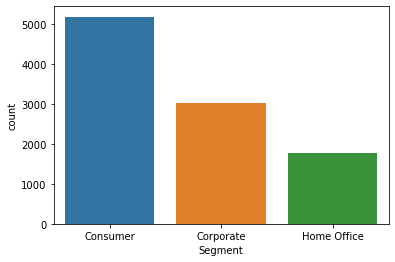

In [11]:
#Analysing segment of people buying for super market
data['Segment'].value_counts()
sns.countplot(x=data['Segment'])

In [12]:
#Analysing segment of people buying for super market in percentage
data['Segment'].value_counts()/len(data['Segment'])*100

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

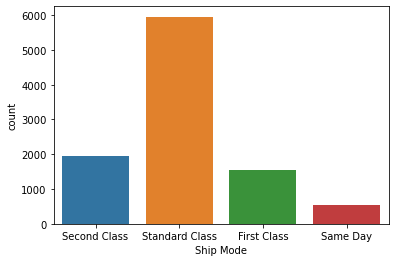

In [13]:
#Analysing ship mode of super market
data['Ship Mode'].value_counts()
sns.countplot(x=data['Ship Mode'])

In [14]:
#Analysing ship mode of super market in percentage
data['Ship Mode'].value_counts()/len(data['Ship Mode'])*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='count'>

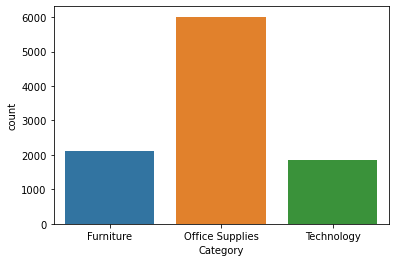

In [15]:
#Analysing category of items in super market
data['Category'].value_counts()
sns.countplot(x=data['Category'])

In [16]:
#Analysing category of items in super market in percentage
data['Category'].value_counts()/len(data['Category'])*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

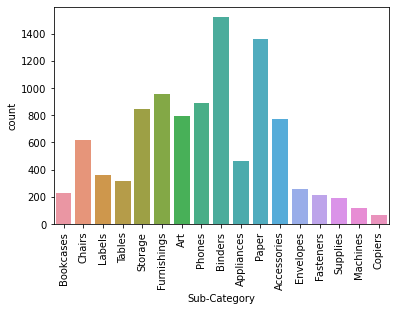

In [21]:
#Analysing sub-category of items in super market
data['Sub-Category'].value_counts()
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation = 90)

In [18]:
#Analysing sub-category of items in super market in percentage
data['Sub-Category'].value_counts()/len(data['Sub-Category'])*100

Binders        15.255087
Paper          13.621329
Furnishings     9.582039
Phones          8.910494
Storage         8.479503
Art             7.968327
Accessories     7.767866
Chairs          6.164178
Appliances      4.670743
Labels          3.638368
Tables          3.197354
Envelopes       2.545855
Bookcases       2.285256
Fasteners       2.175003
Supplies        1.904380
Machines        1.152651
Copiers         0.681568
Name: Sub-Category, dtype: float64

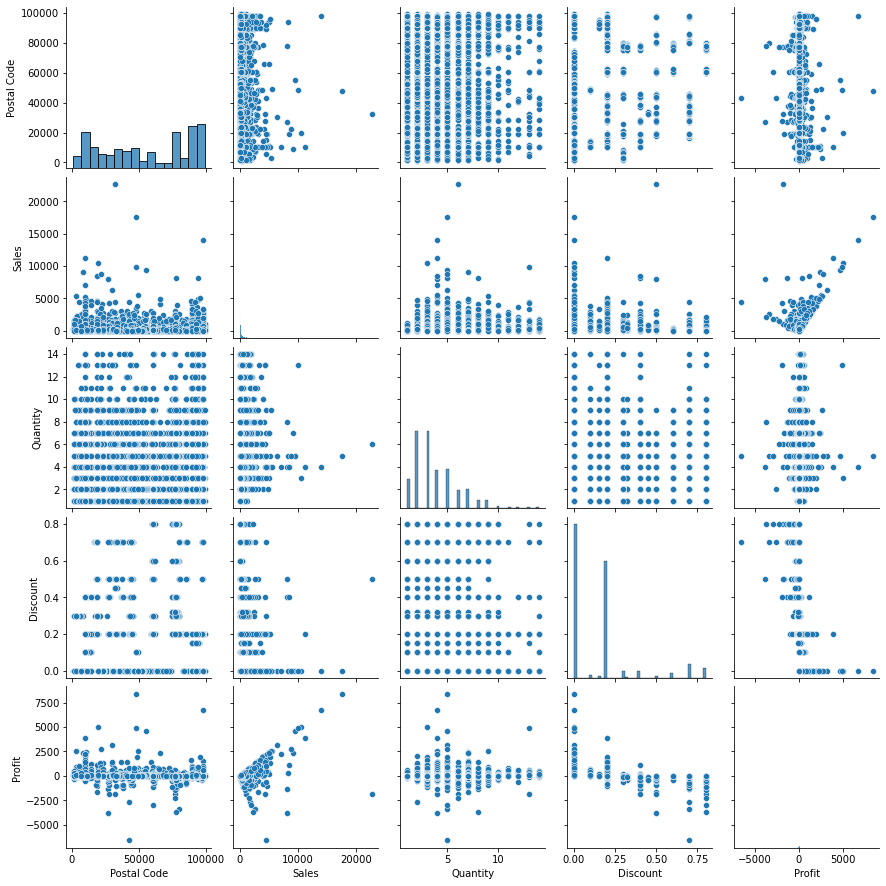

In [43]:
sns.pairplot(data)

In [44]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


Sales, Profit and with respect to Category

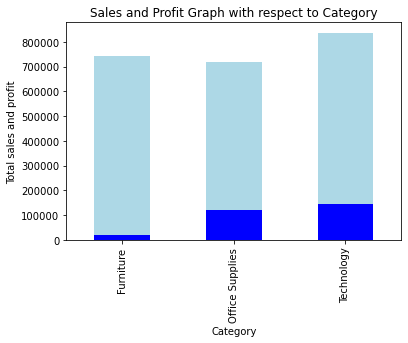

In [61]:
cs=data.groupby("Category").Sales.sum()
cp=data.groupby("Category").Profit.sum()


graph=cs.plot(kind="bar",color="lightblue")
graph=cp.plot(kind="bar",color="blue")


graph.set_title("Sales and Profit Graph with respect to Category")
graph.set_ylabel("Total sales and profit")

plt.show()